In [1]:
from konlpy.tag import Kkma , Komoran , Okt
from collections import Counter
import matplotlib.pyplot as plt
import re
from nltk import word_tokenize 
from nltk.util import ngrams
from nltk.corpus import stopwords
plt.style.use('default')

import pandas as pd
import numpy as np

In [2]:
stop_words = set(stopwords.words('english')) 

In [3]:
kmoran = Komoran()

In [3]:
df = pd.read_excel('../preprocessing/lyrics_dataset/emotion_labels(ko).xlsb.xlsx')
del df['Unnamed: 0']

In [4]:
data = df.copy()

In [6]:
data['emotion_v2'].value_counts()

0.0     1535
6.0     1401
2.0     1196
7.0      957
3.0      934
4.0      569
5.0      563
8.0      456
9.0      409
10.0     127
Name: emotion_v2, dtype: int64

In [6]:
emotion = {'love' : '' ,'fun' : '' , 'enthusiasm' : '' ,'happyness':''
           , 'sadness' : '' ,'anger': '','lonely': '' , 'longing' : '' , 'fear' : ''}

In [8]:
def lyrics_to_corpus(lyrics):
    lyrics = re.split('\r\n|\n',lyrics)
    #중복제거
    corpus = list(set(lyrics))
    result = " ".join(corpus)
    return result

In [15]:
for i in range(len(emotion)):
    emotion_df = data[data['emotion_v2'] == i+2]
    corpus = " ".join(emotion_df['lyrics splited'].values)
    emotion[list(emotion.keys())[i]] = corpus

In [17]:
#코모란 형태소 분석기
def emotion_tokenizer(corpus):
    temp = []
    for i in kmoran.pos(corpus):
        if (i[1] == 'NNG' or i[1] == 'NNP'):
            temp.append(i[0])
        elif (i[1] == 'VV' or i[1] == 'VA'):
            temp.append(i[0] + "다")
        elif (i[1] == 'SL'):
            if i[0].lower() not in stop_words:
                temp.append(i[0].lower())
    return temp

In [19]:
emotion_count = {}
vocab = {}
for i in range(len(emotion)):
    emotion_key = list(emotion.keys())[i]
    emotion_count[emotion_key] = Counter(emotion_tokenizer(emotion[emotion_key])).most_common(300)
    for words , counts in emotion_count[emotion_key]:
        if words in list(vocab.keys()):
            vocab[words][emotion_key] = counts
        else:
            vocab[words] = {emotion_key : counts }

In [104]:
emotion_keys = list(emotion.keys())
for word in list(vocab.keys()):
    total = sum(vocab[word].values())
    for keys in emotion_keys:
        try:
            vocab[word][keys] = round( (vocab[word][keys]  / total) , 2 )
        except KeyError:
            pass

In [24]:
def lexicon_emotion_clf(sentence):
    temp = Counter()
    for word in emotion_tokenizer(sentence):
        try:
            temp = temp + Counter(vocab[word])
        except KeyError:
            pass
    emotion = list(temp.keys())
    score = list(temp.values())
    
    plt.pie(score, labels=emotion, autopct='%.1f%%')
    plt.show()
    
    return [k for k,v in dict(temp).items() if max(dict(temp).values()) == v]

In [25]:
test = """아름다운지 말야
You are my celebrity
celebrity
You are my celebrity
지쳐버린 표정 마치
전원을 꺼놓은 듯이
심장소린 too quiet
네가 가진 반짝거림,
상상력, identity
까지 모조리 diet
넌 모르지
아직 못다 핀
널 위해 쓰여진
오래된 사랑시
헤매도 좋으니
웃음 짓게 되길
The one and only
You are my celebrity
잊지마 넌 흐린 어둠 사이
왼손으로 그린 별 하나
보이니 그 유일함이 얼마나
아름다운지 말야
You are my celebrity
발자국마다 이어진 별자리
그 서투른 걸음이 새겨놓은 밑그림
오롯이 너를 만나러 가는 길
그리로 가면 돼 점선을 따라
잊지마 이 오랜 겨울 사이
언 틈으로 피울 꽃 하나
보이니 하루 뒤 봄이 얼마나
아름다울지 말야
You are my celebrity
celebrity
You are my celebrity """

In [26]:
lyrics_to_corpus(test)

'아름다운지 말야 celebrity 넌 모르지 언 틈으로 피울 꽃 하나 헤매도 좋으니 그 서투른 걸음이 새겨놓은 밑그림 오래된 사랑시 아름다울지 말야 발자국마다 이어진 별자리 You are my celebrity 심장소린 too quiet 널 위해 쓰여진 오롯이 너를 만나러 가는 길 잊지마 넌 흐린 어둠 사이 까지 모조리 diet 왼손으로 그린 별 하나 지쳐버린 표정 마치 잊지마 이 오랜 겨울 사이 You are my celebrity  네가 가진 반짝거림, 보이니 그 유일함이 얼마나 그리로 가면 돼 점선을 따라 보이니 하루 뒤 봄이 얼마나 The one and only 상상력, identity 웃음 짓게 되길 전원을 꺼놓은 듯이 아직 못다 핀'

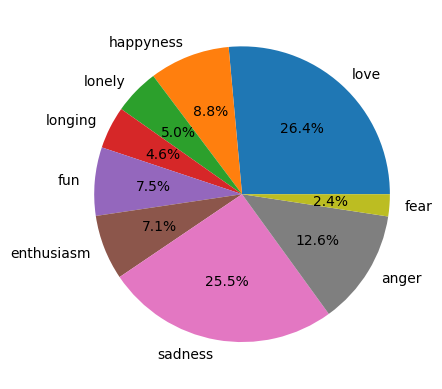

['love']

In [27]:
lexicon_emotion_clf(lyrics_to_corpus(test))